# Examen 2
## Física Computacional
### Hernández Ramos Sandra 
$Sandii\hbar ers^{\heartsuit}$ 🦆🌵🌹🥀🌿🍀🌺🌷



## Julia

In [1]:
using Plots
using LaTeXStrings
using Roots
#import Pkg
#Pkg.add("Roots")

Resuelva los siguientes ejercicios, explicando claramente su razonamiento

<span style="color:blue">1. Se tiene un oscilador armónico en dos dimensiones $(xy)$ en el que la fuerza está dada por $\vec{F}=-k\vec{r}$ y se tiene una fricción $\vec{f}_{fric}=-\gamma\vec{v}$   si  $|\vec{v}| ≤ 1$, pero cuando $|\vec{v}|>1$ la fracción es $\vec{f}_{fric}=-\mu v^{3/2}\hat{v}$. Si $m=1$, $k=1$, $y=0.1$ y $\mu=0.2$, resuelva los siguientes ejercicios:<span>

<span style="color:blue">a). Encuentre las ecuaciones de movimiendo en coordenadas cartesianas. No es necesario resolver las ecuaciones.<span>

Por segunda ley de Newton tenemos que la fuerza total del sistema esta dada por:
$$\vec{F}_{total}=m\vec{a}=m\frac{d^{2}\vec{r}}{dt^{2}}=\vec{F}+\vec{f}_{fric}$$


Ahora veamos cuál es la fuerza total del sistema para los diferentes casos. 

1.Fuerza total del sistema. Si $|\vec{v}| ≤ 1$

\begin{equation}
\begin{aligned}
\vec{F}_{total_1}=m\frac{d^{2}\vec{r}}{dt^{2}}&=-k\vec{r}-\gamma \vec{v}\\
&=-k\vec{r}-\gamma \frac{d \vec{r}}{dt}
\end{aligned}
\end{equation}

2.Fuerza total del sistema. Si  $|\vec{v}|>1$

\begin{equation}
\begin{aligned}
\vec{F}_{total_2}=m\frac{d^{2}\vec{r}}{dt^{2}}&=-k\vec{r}-\mu v^{3/2}\hat{v}\\
&=-k\vec{r}-\mu v^{3/2}\left(\frac{\vec{v}}{|v|}\right)\\
&=-k\vec{r}-\mu v^{3/2}\left(\frac{\vec{v}}{v}\right)\\
&=-k\vec{r}-\mu v^{1/2}\vec{v}\\
&=-k\vec{r}-\mu \left(\frac{dr}{dt}\right)^{1/2}\frac{d\vec{r}}{dt}
\end{aligned}
\end{equation}

Estas ecuaciones las podemos escribir en componentes.


Para el eje $x$ tenemos:

Si $|\vec{v}| ≤ 1$
\begin{equation}
m\frac{d^{2}x}{dt^{2}}=-kx-\gamma \frac{dx}{dt}
\end{equation}

Si  $|\vec{v}|>1$
\begin{equation}
m\frac{d^{2}x}{dt^{2}}=-kx-\mu \left(\left(\frac{dx}{dt}\right)^{2}+\left(\frac{dy}{dt}\right)\right)^{1/4}\frac{dx}{dt}
\end{equation}

Para el eje $y$ tenemos:

Si $|\vec{v}| ≤ 1$
$$
m\frac{d^{2}y}{dt^{2}}=−ky−γ\frac{dy}{dt}
$$
 
Si  $|\vec{v}|>1$
$$
m\frac{d^{2}y}{dt^{2}}=−ky−µ\left(\left(\frac{dx}{dt}\right)^{2}+\left(\frac{dy}{dt}\right)\right)^{1/4}\frac{dy}{dt} 
$$

Sustituyendo $m=1$, $k=1$, $\gamma=0.1$ y $\mu=0.2$ tenemos:

Para el eje $x$:

Si $|\vec{v}| ≤ 1$
\begin{equation}
\frac{d^{2}x}{dt^{2}}=-x-0.1 \frac{dx}{dt}
\end{equation}

Si  $|\vec{v}|>1$
\begin{equation}
\frac{d^{2}x}{dt^{2}}=-x-0.2\left(\left(\frac{dx}{dt}\right)^{2}+\left(\frac{dy}{dt}\right)\right)^{1/4}\frac{dx}{dt}
\end{equation}

Para el eje $y$:

Si $|\vec{v}| ≤ 1$
$$
\frac{d^{2}y}{dt^{2}}=−y−0.1\frac{dy}{dt}
$$
 
Si  $|\vec{v}|>1$
$$
\frac{d^{2}y}{dt^{2}}=−y−0.2\left(\left(\frac{dx}{dt}\right)^{2}+\left(\frac{dy}{dt}\right)\right)^{1/4}\frac{dy}{dt} 
$$

Con lo anterior podemos escribir un sistema de ecuaciones diferenciales.

usando
$$x'=\frac{dx}{dt}=v_{x}$$
$$y'=\frac{dy}{dt}=v_{y}$$
Tenemos:

Para el eje x
$$ \begin{cases}
 v_x'=−x−0.1v_x &   Si  & |\vec{v}|≤1 \\
v_x'=−x−0.2\left(v_x^{2}+v_y^{2}\right)^{1/4}v_x &  Si  & |\vec{v}|>1
\end{cases}$$
Para el eje y:
$$ \begin{cases}
v'_y=−y−0.1v_y &   Si  & |\vec{v}|≤1 \\
v_y'=−y−0.2\left(v_x^{2}+v_y^{2}\right)^{1/4}v_y &  Si  & |\vec{v}|>1
\end{cases}$$

<span style="color:blue">b). Utilice el método de Runge-Kutta de 4to orden para encontrar la solución a las ecuaiones de movimiento en el inciso anterior con condiciones iniciales $\vec{r}_{0}=(0,1)$ y $\vec{v}_{0}=(\cos\theta,\sin \theta)$, donde $\theta=\frac{n\pi}{6}$ con n=0,1,2,3,...,10,11. <span>

Definimos una función con el sistema de ecuaciones diferenciales 

In [20]:
function sistema_ejercicio1(x,t)
    dx=x[3] #v_x
    dy=x[4] #v_y
    v=x[3]^2+x[4]^2 #v_x^{2}+v_{y}^{2}
    #Establecemos las condiociones Si |\vec{v}|>1 ≤1
    if sqrt(v^2)<=1 #La raíz cuadrada de un cuadrado es igual al valor absoluto
        dv_x=-x[1]-0.1*x[3]
        dv_y=-x[2]-0.1*x[4]
    else
        dv_x=-x[1]-0.2*(v^(1/4))*x[3]
        dv_y=-x[2]-0.2*(v^(1/4))*x[4]
    end
    return [dx,dy,dv_x,dv_y]
end
        
    

sistema_ejercicio1 (generic function with 1 method)

Usamos las función del método de Runge-Kutta de 4to orden vista en clase. (Notebook 10)

In [21]:
#Copiamos tal cual esta en el Notebook 10 😅
function RK_4(edo,x_ini,t)
    sol = zeros( length(t) , length(x_ini) )
    sol[1,:] .= x_ini
    δ = t[2]-t[1]
    for i in 1:length(t)-1
        k1 = edo(sol[i,:],t[i])
        k2 = edo(sol[i,:] .+ 0.5*δ.*k1 , t[i] + 0.5*δ)
        k3 = edo(sol[i,:] .+ 0.5*δ.*k2 , t[i] + 0.5*δ)
        k4 = edo(sol[i,:] .+ δ.*k2 , t[i] + δ)
        sol[i+1,:] .= sol[i,:] .+ (δ/6.0).*(k1 .+ 2.0.*k2 .+ 2.0.*k3 .+ k4)
    end
    return sol
end

RK_4 (generic function with 1 method)

Probamos nuestra solución

In [23]:
tiempo_prueba=collect(0:0.01:10π)
solucion_prueba=RK_4(sistema_ejercicio1,[0.0,1.0,1.0,0.0],tiempo_prueba)

3142×4 Array{Float64,2}:
  0.0         1.0       1.0        0.0       
  0.00999484  0.99995   0.998951  -0.00999484
  0.0199787   0.9998    0.997802  -0.0199787 
  0.0299506   0.99955   0.996555  -0.0299506 
  0.0399095   0.999201  0.99521   -0.0399095 
  0.0498544   0.998752  0.993767  -0.0498544 
  0.0597845   0.998204  0.992226  -0.0597845 
  0.0696986   0.997557  0.990587  -0.0696986 
  0.0795959   0.99681   0.988851  -0.0795959 
  0.0894753   0.995965  0.987017  -0.0894753 
  0.0993359   0.995021  0.985087  -0.0993359 
  0.109177    0.993978  0.983061  -0.109177  
  0.118997    0.992837  0.980938  -0.118997  
  ⋮                                          
 -0.0323352   0.204962  0.208195   0.0323352 
 -0.0302527   0.205275  0.2083     0.0302527 
 -0.0281693   0.205567  0.208384   0.0281693 
 -0.0260851   0.205838  0.208447   0.0260851 
 -0.0240004   0.206089  0.208489   0.0240004 
 -0.0219154   0.206318  0.20851    0.0219154 
 -0.0198303   0.206527  0.20851    0.0198303 
 -0.01774

Para cumplir con las condiciones iniciales donde $\theta=\frac{n\pi}{6}$ con n=0,1,2,3,...,10,11 hacemos lo siguiente:

In [24]:
#Primero definimos nuestro conjunto de n
n=collect(0:11) #n=n=0,1,2,3,...,10,11 
#Definimos el tiempo a evaluar
t1=collect(0:0.1:100)
#Hacemos ciclo for para cumplir la condición inicial de theta
for i in n
    solucion1=RK_4(sistema_ejercicio1,[0.0,1.0,cos(i*π/6),sin(i*π/6)],t1)
end

Gráficamos:

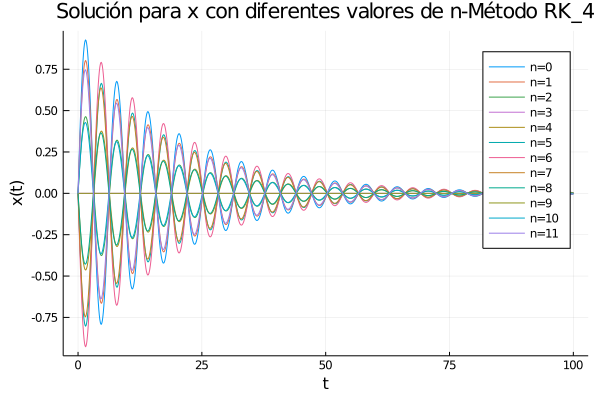

In [31]:
plot(title="Solución para x con diferentes valores de n-Método RK_4",xlabel="t",ylabel="x(t)")
for i in n 
    solucion1=RK_4(sistema_ejercicio1,[0.0,1.0,cos(i*π/6),sin(i*π/6)],t1)
    plot!(t1,solucion1[:,1],label="n=$(i)",lw=1.0)
end
plot!()

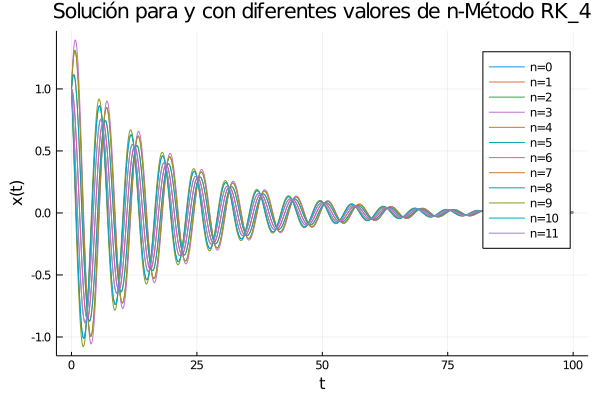

In [36]:
#Escribimos lo mismo que en el gráfico anterior pero cambiamos a x[2]
#porque x[2]=y
plot(title="Solución para y con diferentes valores de n-Método RK_4",xlabel="t",ylabel="x(t)")
for i in n 
    solucion1=RK_4(sistema_ejercicio1,[0.0,1.0,cos(i*π/6),sin(i*π/6)],t1)
    plot!(t1,solucion1[:,2],label="n=$(i)",lw=1.0) 
end
plot!()

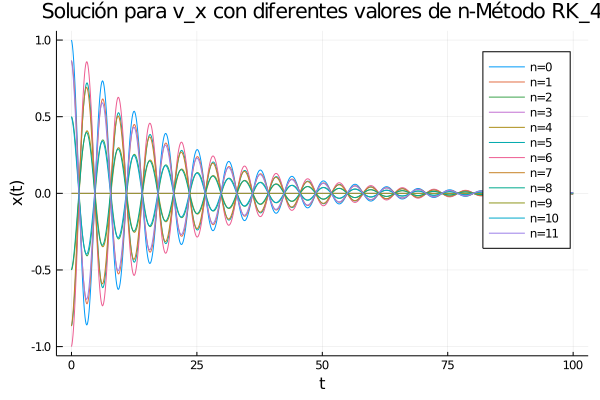

In [38]:
#Escribimos lo mismo que en el gráfico anterior pero cambiamos a x[3]
#porque x[3]=dx
plot(title="Solución para v_x con diferentes valores de n-Método RK_4",xlabel="t",ylabel="x(t)")
for i in n 
    solucion1=RK_4(sistema_ejercicio1,[0.0,1.0,cos(i*π/6),sin(i*π/6)],t1)
    plot!(t1,solucion1[:,3],label="n=$(i)",lw=1.0) 
end
plot!()


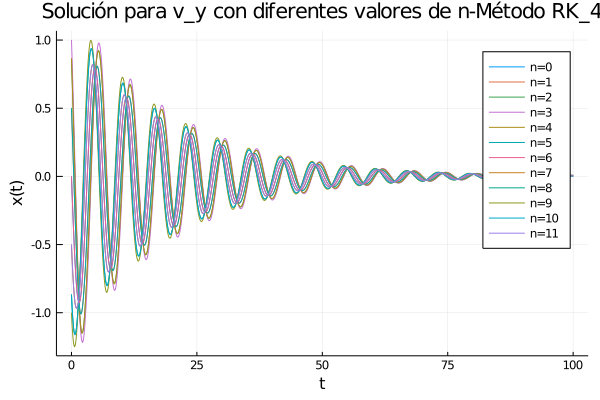

In [37]:
#Escribimos lo mismo que en el gráfico anterior pero cambiamos a x[3]
#porque x[4]=dy
plot(title="Solución para v_y con diferentes valores de n-Método RK_4",xlabel="t",ylabel="x(t)")
for i in n 
    solucion1=RK_4(sistema_ejercicio1,[0.0,1.0,cos(i*π/6),sin(i*π/6)],t1)
    plot!(t1,solucion1[:,4],label="n=$(i)",lw=1.0) #4
end
plot!()

<span style="color:blue">c). Genere una función que calcule la energía para las distintas condicines iniciales y detenga la simulación cuando ésta sea menor al 30% de su valor inicial. Cabe mencionar que debe hacer su simulación (paso de integración) de tal manera que el error en la trayectoria no tenga variaciones de más del 1%, es decir se debe asegurar convergencia a la solución con error de a lo más 1%. <span>

La energía total del sistema esta dado por la ecuación:
$$E=\frac{m}{2}(v^{2}_{x}+v_{y}^{2})+\frac{k}{2}(x^{2}+y^{2})$$
Sustituyendo los valores para m y k (m=1,k=1) tenemos:
$$E=\frac{1}{2}(v^{2}_{x}+v_{y}^{2})+\frac{1}{2}(x^{2}+y^{2})$$
$$\rightarrow E=\frac{1}{2}(v^{2}_{x}+v_{y}^{2}+x^{2}+y^{2})$$

Definimos una función para obtener la energía:

In [39]:
function energia(p0,t,EDO)
    #Definimos los arreglos donde vamos a guardar la información
    #de las posiciones y velocidades
    x=RK_4(EDO,p0,t)[:,1]
    y=RK_4(EDO,p0,t)[:,2]
    vx=RK_4(EDO,p0,t)[:,3]
    vy=RK_4(EDO,p0,t)[:,4]
    #Arreglo donde se guardará la energía para cada  tiempo
    E=[]
    #Energía inicial
    Einicial=0.5*(x[1]^2+y[1]^2+vx[1]^2+vy[1]^2)
    #ciclo for para obtener la energía de los demás tiempos
    for i in 1:length(t)
    #Ecuación para la i-ésima posición
        energia=0.5*(x[i]^2+y[i]^2+vx[i]^2+vy[i]^2)
        #Como el sistema perderá energía, pedimos que se guarde la información
        #cuando la energía sea mayor a 30%
        if energia>=0.3*Einicial
            push!(E,energia)
        end
    end
    return E
end

energia (generic function with 1 method)

In [40]:
function energia_2(p0,t,EDO)
     #Definimos los arreglos donde vamos a guardar la información
    #de las posiciones y velocidades
    x=RK_4(EDO,p0,t)[:,1]
    y=RK_4(EDO,p0,t)[:,2]
    vx=RK_4(EDO,p0,t)[:,3]
    vy=RK_4(EDO,p0,t)[:,4]
     #Arreglo donde se guardará la energía para cada  tiempo
    E=[]
    #Energía inicial
    Einicial=0.5*(x[1]^2+y[1]^2+vx[1]^2+vy[1]^2)
    #ciclo for para obtener la energía de los demás tiempos
    for i in 1:length(t)
        energia=0.5*(x[i]^2+y[i]^2+vx[i]^2+vy[i]^2)
         #Como el sistema perderá energía, pedimos que se guarde la información
        #cuando la energía sea mayor a 30%
        if energia>=0.3*Einicial
            push!(E,energia)
        else
            return E
        end 
    end 
   
end

energia_2 (generic function with 1 method)

In [41]:
function energia_3(p0,t,EDO)
    #Definimos los arreglos donde vamos a guardar la información
    #de las posiciones y velocidades
    x=RK_4(EDO,p0,t)[:,1]
    y=RK_4(EDO,p0,t)[:,2]
    vx=RK_4(EDO,p0,t)[:,3]
    vy=RK_4(EDO,p0,t)[:,4]
     #Arreglo donde se guardará la energía para cada  tiempo
    E=[]
    tiempo=[]  #tiempo
    #Energía inicial
    Einicial=0.5*(x[1]^2+y[1]^2+vx[1]^2+vy[1]^2)
    #Ciclo for para obtener la energía de los demás tiempos
    for i in 1:length(t)
        energia=0.5*(x[i]^2+y[i]^2+vx[i]^2+vy[i]^2)
        if energia>=0.3*Einicial
    
            #push!(E,energia)
            push!(tiempo,t[i])
        else
            return tiempo
        end 
    end 
   
end

energia_3 (generic function with 1 method)

Para comprobar que tenemos convergencia a la solución con error de a lo más 1%, definimos una función que nos dé la máxima variación que tiene para ello vamos a comparar la solución obtenida con RK_4 y la que se obtiene con RK_2(para comparar correctamente ya que no se puede con RK_4)

Usamos las función del método de Runge-Kutta de 4to orden vista en clase. (Notebook 10)

In [22]:
#Copiamos tal cual esta en el Notebook 10 😅
function RK_2(edo,x_ini,t)
    sol = zeros( length(t) , length(x_ini) )
    sol[1,:] .= x_ini
    δ = t[2]-t[1]
    for i in 1:length(t)-1
        k1 = sol[i,:] .+ 0.5*δ .*edo(sol[i,:],t[i])
        sol[i+1,:] .= sol[i,:] .+ δ*edo(k1,t[i]+0.5*δ)
    end
    return sol
end

RK_2 (generic function with 1 method)

In [43]:
#Pedimos que nos dé dos soluciones 
function maxima_variacion(sol1,sol2)
    #Definimos los arreglos donde vamos a guardar la información
    #de las posiciones y velocidades
    x1=sol1[:,1]
    y1=sol1[:,2]
    vx1=sol1[:,3]
    vy1=sol1[:,4]
    x2=sol2[:,1]
    y2=sol2[:,2]
    vx2=sol2[:,3]
    vy2=sol2[:,4]
    #Definimos los arreglos donde vamos a guardar la información
    #de las posiciones y velocidades
    difx=[]
    dify=[]
    difvx=[]
    difvy=[]
    #Ciclo for para ir agregando las diferencias entre las soluciones
    for i in 1:length(sol1[:,1])
        push!(difx,abs(x1[i]-x2[i]))
        push!(dify,abs(y2[i]-y1[i]))
        push!(difvx,abs(vx1[i]-vx2[i]))
        push!(difvy,abs(vy1[i]-vy2[i]))
    end
    #Arreglo donde se agregará el maximo de cada una
    #de las diferencias entre las soluciones
    dif=[maximum(difx),maximum(dify),maximum(difvx),maximum(difvy)]
    #Obtener la diferencia máxima
    max=maximum(dif)
    return max
end

maxima_variacion (generic function with 1 method)

Ahora probamos la función:

In [45]:
tiempo_prueba2=collect(0:0.01:10π)
maxima_variacion(RK_4(sistema_ejercicio1,[0.0,1.0,1.0,0.0],tiempo_prueba2),RK_2(sistema_ejercicio1,[0.0,1.0,1.0,0.0],tiempo_prueba2))

0.00012282714063324707

Ahora hacemos un Ciclo for para analizar la convergencia de las soluciones para un tiempo y notar si se cumple la solución

In [46]:
#Primero definimos nuestro conjunto de n
n=collect(0:11)
#Definimos tiempo a evaluar
tiempov=collect(0:0.01:10π)
#Arreglo donde agregará la convergencia de las soluciones 
#ara diferntes i
variaciones=[]
for i in n 
    push!(variaciones, maxima_variacion(RK_4(sistema_ejercicio1,[0.0,1.0,cos(i*π/6),sin(i*π/6)],tiempov),RK_2(sistema_ejercicio1,[0.0,1.0,cos(i*π/6),sin(i*π/6)],tiempov)))
end
#Pedimos al arreglo que regrese la variación máxima de
#todas las soluciones.
return(maximum(variaciones))

0.00025978789191305474

In [50]:
if maximum(variaciones)<=0.01 
    print("Cumple con la convergencia de 0.01")
else
    print("No cumple con la convergencia de 0.01")
end

Cumple con la convergencia de 0.01

Como nos dice el ciclo for, sí se cumple la convergencia ahora vamos a obtener la energía para diferentes n. (Usaremos el mismo tiempo)

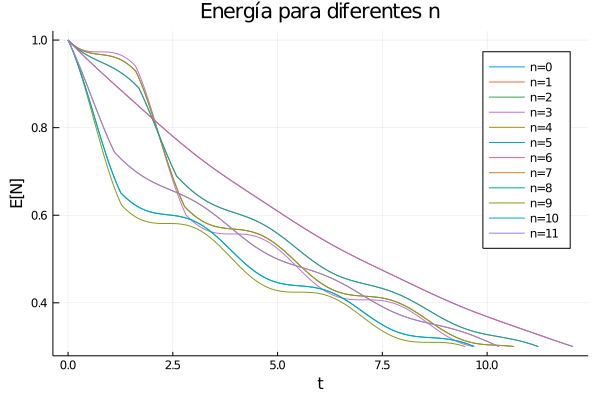

In [52]:
tiempov=collect(0:0.01:10π)
plot(title="Energía para diferentes n",xlabel="t",ylabel="E[N]")
for i in n 
    Energia=(energia_2([0.0,1.0,cos(i*π/6),sin(i*π/6)],tiempov,sistema_ejercicio1))
    t=(energia_3([0.0,1.0,cos(i*π/6),sin(i*π/6)],tiempov,sistema_ejercicio1))
    plot!(t,Energia,label ="n=$(i)", lw=1.0)
end
plot!()

In [ ]:
con la gráfica podemos ver que la simulación se detiene  cuando esta sea menor al 30 % de su valor inicial

<span style="color:blue">d). Dibuje las gráficas del momento angular para los casos anteriores en el inciso (1b). <span>

<span style="color:blue">e). Tome de manera arbitraria alguna condición inicial y dibuje el espacio fase $(p_x,x)$ <span>

<span style="color:blue">2. Suponga que se tiene el sistema como en el problema anterior, pero ahora la partícula tiene carga $q > 0$
y en el origen también se encuentra una partícula de carga $q > 0$. <span>

<span style="color:blue">a).Sin considerar la fricción, ¿El sistema puede tener órbitas cerradas?. De ser así, encuentre algunas de estas órbitas o muestre que el sistema no puede tener este tipo de órbitas. (Apoye sus
argumentos con alguna simulación).
 <span>

<span style="color:blue">b). Considerando fricción, ¿El sistema puede tener órbitas cerradas?. De ser así, encuentre algunas de
estas órbitas o muestre que el sistema no puede tener este tipo de órbitas. (Apoye sus argumentos con alguna simulación). <span>

<span style="color:blue">3. Se obtiene la siguiente función:
$$  
f(x,y)=2e^{-(x+1)^{2}}(e^{-(y+2)^{2}}+e^{-y-2)^{2}})+6x(x^{2}+y^{2})e^{-x^{2}+y^{2})}-1 
$$<span>

<span style="color:blue">Encuentre los puntos $(\tilde{x},\tilde{y})$ tales que $f=(\tilde{x},\tilde{y})=0$ y dibuje estos puntos en el plano $xy$.<span>
    
<span style="color:blue">Hint:Como podrá notar los puntos a buscar se encuentran en la región $x,y \in (-4,4)\times(-4,4)$. Una forma de obtener los puntos es haciendo un barrido para $x$ fija y encontrando todas las raíces de la ecuación en términos de $y$. Entre más fino haga el barrido, la curva de nivel que se encuentre será mejor.<span>
